In [30]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 舊貨拍賣模型

## 前提

假設每個人都可以跟另外一個人進行一次交易，在每次交易的過程，每個人付出的物品的價值(假設為20元)$+$20\%$ 或者是 $-17\%$，兩者的機率是相等的，所以每一次交易下來的期望值為

In [2]:
def trade(dE,win=0.2,loss=0.17,win_rate = 0.5):
    return dE*((1+win)*win_rate + (1-loss)*(1-win_rate))

In [3]:
trade(20)

20.299999999999997

首先我們透過 gini值 來表達貧富不均的概況，參考 https://github.com/oliviaguest/gini

In [ ]:
def gini(array):
    # ref: 
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

現在假設，手邊有10個人，每個人都擁有100元，每次交易的時候都任意挑出兩個人，並且根據公平的市場機制，並以較窮的一邊作為主角，假設贏了，那麼就獲得主角現額20%，輸了就是付出主角的17%，那麼可以寫出底下的模擬函數

In [83]:
def free(population = 100,rounds = 10000):
    people = np.ones((population,)) * 100
    jump = 0 
    print(f'original gini:{gini(people)}')
    win_counter = 0
    fighters = np.random.choice(population,(rounds,2))
    counter = 0
    for fighter in fighters:
        counter += 1
        if counter % int(rounds/10) == 0:
            print(f'step {counter} gini:{gini(people)}')
        if fighter[0] == fighter[1]:
            jump += 1
            continue
        money1 = people[fighter[0]]
        money2 = people[fighter[1]]
        #print(f'now {fighters[0]}:{people[fighters[0]]},{fighters[1]}:{people[fighters[1]]}')    
        if np.random.random()>0.5:

            # win
            if money1 > money2:
                m = money2*0.2
                people[fighter[1]] += m
                people[fighter[0]] -= m
            else:
                m = money1*0.2
                people[fighter[1]] -= m
                people[fighter[0]] += m
            #print(f'win {fighters[0]}:{people[fighters[0]]},{fighters[1]}:{people[fighters[1]]}')
            win_counter += 1
        else:
            # loss
            if money1 > money2:
                m = money2*0.17
                people[fighter[1]] -= m
                people[fighter[0]] += m
            else:
                m = money1*0.17
                people[fighter[1]] += m
                people[fighter[0]] -= m
            #print(f'loss {fighters[0]}:{people[fighters[0]]},{fighters[1]}:{people[fighters[1]]}')
    print(win_counter)
    print(f'later gini:{gini(people)}')
    return people,jump

        
            
        
        

先算兩萬三千人，每年至少有130次與他人交易的數字

In [84]:
people,jump = free(population=23000,rounds = 230000*13)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
original gini:0.0
step 299000 gini:0.3660325718745033
step 598000 gini:0.4586275886428512
step 897000 gini:0.5161267984501084
step 1196000 gini:0.5596519474885789
step 1495000 gini:0.5925091043317997
step 1794000 gini:0.6179983099538289
step 2093000 gini:0.638942636614855
step 2392000 gini:0.6575550772593395
step 2691000 gini:0.6725313445454428
step 2990000 gini:0.6866868993149713
1494753
later gini:0.6866869579878355


接著來畫圖看看整體財富分配的狀況

In [75]:
jump

132

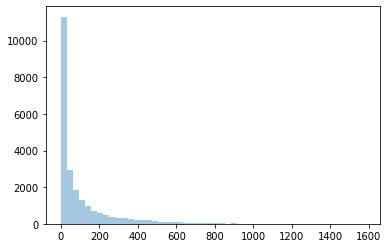

In [77]:
df = pd.DataFrame({"people": people})
sns.distplot(df, kde=False, rug=False)